**Set up env**

In [ ]:
pip install opencv-python ipyplot

**Import what is needed**

In [ ]:
import cv2 #used to load the images (in the future it will have other uses)
import numpy as np
import glob #used to read image names
import random #used to generate tran/test split
import ipyplot #it will be explained
from matplotlib import pyplot as plt #for all ur plotting needs


    WARNING! Google Colab Environment detected!
    You might encounter issues while running in Google Colab environment.
    If images are not displaying properly please try setting `base_64` param to `True`.
    


In [ ]:
base_path = "/content/drive/My Drive/fac/Laborator/Images/" #this is janky af
files_list = []
for i in range(4):
  files_list.append(glob.glob(base_path+str(i)+"/*.jpg"))
  print(glob.glob(base_path+str(i)+"/*.jpg")) #this is just so you can see output (delete)

['/content/drive/My Drive/fac/Laborator/Images/0/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/2.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/3.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/5.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/6.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/7.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/8.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/9.jpg']
['/content/drive/My Drive/fac/Laborator/Images/1/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/2.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/3.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/5.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/6.jpg', '/content/drive/My Drive/fac/Laborator/Images/

In [ ]:
random.seed(42)#if we all use the same data, we will all have the same train/test split (the answer to life the universe and everything)
indexes = random.sample(range(0, 9), 7) #7 reprezents the number of train files
print(indexes)

[1, 0, 5, 2, 8, 4, 7]


In [ ]:
train_files =  []
test_files = []
for L in files_list:
  t =[]
  for i in indexes:
    t.append(L[i])
  train_files.append(t)
  test_files.append([x for x in L if x not in t])

print(train_files)
print(test_files)

[['/content/drive/My Drive/fac/Laborator/Images/0/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/5.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/2.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/8.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/7.jpg'], ['/content/drive/My Drive/fac/Laborator/Images/1/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/5.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/2.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/8.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/7.jpg'], ['/content/drive/My Drive/fac/Laborator/Images/2/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/2/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/2/5.jpg', '/content/drive/My Drive/fac/Laborator/Ima


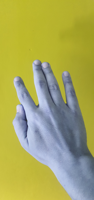
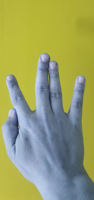
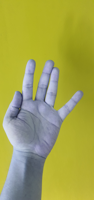
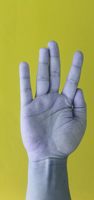
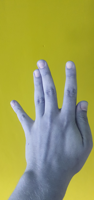
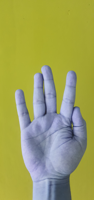
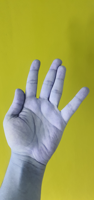


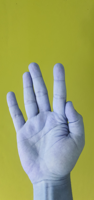
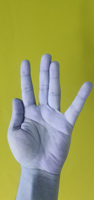
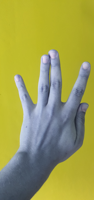

In [ ]:
train_images = []
for L in train_files:
  s = []
  for l in L:
    s.append( cv2.imread(l) )
    #cv2.imshow('image',img)#DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions to crash; see https://github.com/jupyter/notebook/issues/3935.
  train_images.append(s)
test_images = []
for L in test_files:
  s = []
  for l in L:
    s.append( cv2.imread(l) )
  test_images.append(s)

ipyplot.plot_images(train_images[0], max_images=27, img_width=100)    
ipyplot.plot_images(test_images[0], max_images=12, img_width=100)    

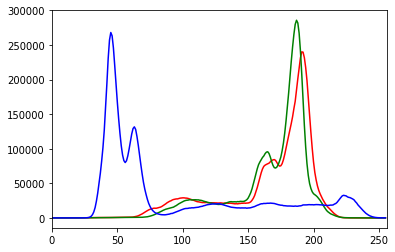

In [ ]:
color = ('r','g','b')
img = train_images[0][0]
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
#red and green = yellow

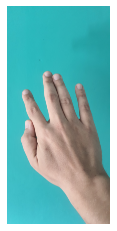

In [ ]:
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [ ]:
np.shape(img)

(4032, 1908, 3)

(806, 381, 3)

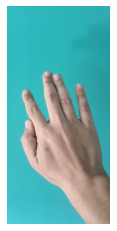

In [ ]:
scale_percent = 20 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize images
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
np.shape(resized)

Train shape: (4, 7, 806, 381, 3)
Test shape: (4, 3, 806, 381, 3)


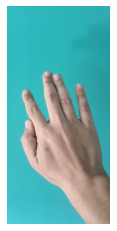

In [ ]:
train_images_resized = []
for S in train_images:
  s = []
  for im in S:
    s.append(cv2.resize(im, dim, interpolation = cv2.INTER_AREA))
  train_images_resized.append(s)

test_images_resized = []
for S in test_images:
  s = []
  for im in S:
    s.append(cv2.resize(im, dim, interpolation = cv2.INTER_AREA))
  test_images_resized.append(s)

print("Train shape:",np.shape(train_images_resized))
print("Test shape:",np.shape(test_images_resized))
plt.axis("off")
plt.imshow(cv2.cvtColor(train_images_resized[0][0], cv2.COLOR_BGR2RGB))

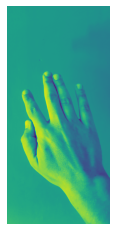

In [ ]:
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.imshow(gray)

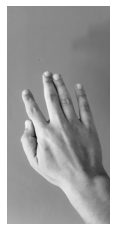

In [ ]:
plt.axis("off")
plt.imshow(gray,cmap='gray')

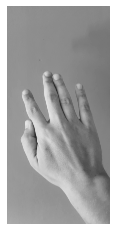

In [ ]:
train_images_resized_gray = []
for S in train_images:
  s = []
  for im in S:
    s.append(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))
  train_images_resized_gray.append(s)

test_images_resized_gray = []
for S in test_images:
  s = []
  for im in S:
    s.append(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))
  test_images_resized_gray.append(s)

plt.axis("off")
plt.imshow(train_images_resized_gray[0][0],cmap='gray')


In [ ]:
import pickle
file = open('/content/drive/My Drive/fac/Laborator/Images/dump_train_images_resized_gray', 'wb')
pickle.dump(train_images_resized_gray, file)
file.close()
file = open('/content/drive/My Drive/fac/Laborator/Images/dump_test_images_resized_gray', 'wb')
pickle.dump(test_images_resized_gray, file)
file.close()

**DISCUTIE DESPRE CE PUTEM FACE PENTRU A SEPARA CAZURILE ILUSTRATE**


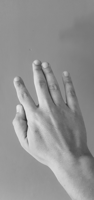
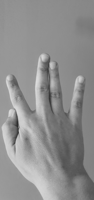
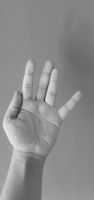
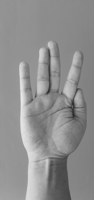
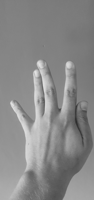
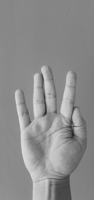
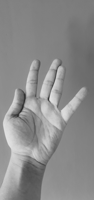
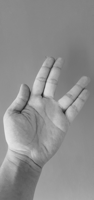
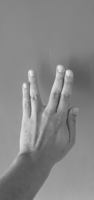
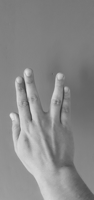
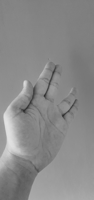
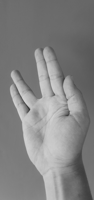
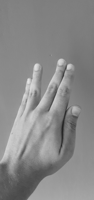
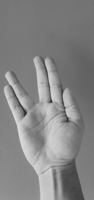
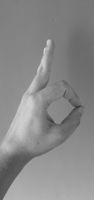
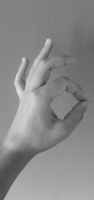
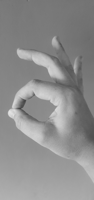
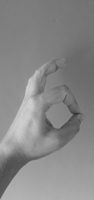
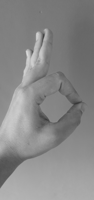
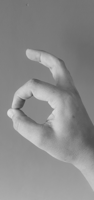
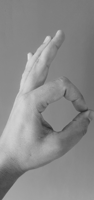
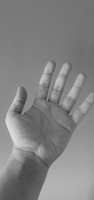
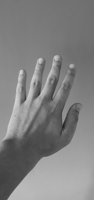
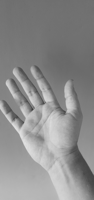
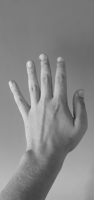
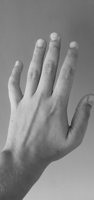
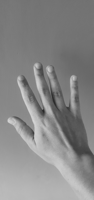

In [ ]:
flat_list = [item for sublist in train_images_resized_gray for item in sublist]
ipyplot.plot_images(flat_list, max_images=27, img_width=100)    


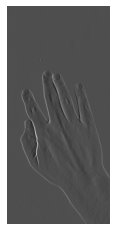

In [ ]:
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)

plt.axis("off")
plt.imshow(sobelx,cmap='gray')
 


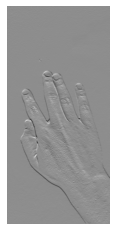

In [ ]:
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5) 

plt.axis("off")
plt.imshow(sobely,cmap='gray')
 

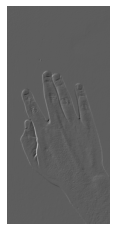

In [ ]:
sobel = cv2.add(sobelx,sobely)

plt.axis("off")
plt.imshow(sobel,cmap='gray')

In [ ]:
print("Max Value: ", sobel.max())
print("Min Value: ", sobel.min())


Max Value:  9262.0
Min Value:  -5318.0


Max Value:  1.0
Min Value:  0.0
Mean Value:  0.06208032928886371


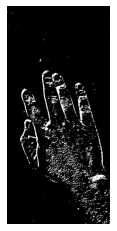

In [ ]:
sobel_norm_x = (sobelx-sobel.min())/(sobelx.max()-sobelx.min())
sobel_norm_y = (sobely-sobel.min())/(sobely.max()-sobely.min())
sobel_norm_xy = cv2.add(sobel_norm_x,sobel_norm_y)
sobel_norm_xy[sobel_norm_xy<1.3] = 0
sobel_norm_xy[sobel_norm_xy>0] = 1
print("Max Value: ", sobel_norm_xy.max())
print("Min Value: ", sobel_norm_xy.min())
print("Mean Value: ", sobel_norm_xy.mean())
plt.axis("off")
plt.imshow(sobel_norm_xy,cmap='gray')